In [1]:
import numpy as np
import pandas as pd


In [2]:
file_path = "/n/dominici_lab/lab/fossil_fuel_energy/data/energy/Region_CAL.xlsx"
df = pd.read_excel(file_path)

In [3]:
print(df.head)

<bound method NDFrame.head of       Region            UTC time Local date  Hour          Local time  \
0        CAL 2015-07-01 08:00:00 2015-07-01     1 2015-07-01 01:00:00   
1        CAL 2015-07-01 09:00:00 2015-07-01     2 2015-07-01 02:00:00   
2        CAL 2015-07-01 10:00:00 2015-07-01     3 2015-07-01 03:00:00   
3        CAL 2015-07-01 11:00:00 2015-07-01     4 2015-07-01 04:00:00   
4        CAL 2015-07-01 12:00:00 2015-07-01     5 2015-07-01 05:00:00   
...      ...                 ...        ...   ...                 ...   
66836    CAL 2023-02-14 04:00:00 2023-02-13    20 2023-02-13 20:00:00   
66837    CAL 2023-02-14 05:00:00 2023-02-13    21 2023-02-13 21:00:00   
66838    CAL 2023-02-14 06:00:00 2023-02-13    22 2023-02-13 22:00:00   
66839    CAL 2023-02-14 07:00:00 2023-02-13    23 2023-02-13 23:00:00   
66840    CAL 2023-02-14 08:00:00 2023-02-13    24 2023-02-14 00:00:00   

      Time zone     DF        D       NG      TI  ...  CO2 Emissions: OIL  \
0       Pacific 

In [4]:
print(df.describe())

               Hour            DF             D            NG            TI  \
count  66841.000000  66841.000000  66817.000000  66817.000000  66817.000000   
mean      12.500292  31237.802666  31440.196537  23158.046695  -7488.929404   
std        6.922537   6595.510429   6374.217740   6366.668789   2347.627037   
min        1.000000   3915.000000   3964.000000   2755.000000 -13412.000000   
25%        7.000000  26534.000000  26857.000000  18807.000000  -9208.000000   
50%       13.000000  29979.000000  30209.000000  22199.000000  -7775.000000   
75%       19.000000  33833.000000  33931.000000  25862.000000  -6108.000000   
max       25.000000  64151.000000  63622.000000  53902.000000   2103.000000   

           Sum (NG)       NG: COL        NG: NG       NG: NUC       NG: OIL  \
count  40513.000000  40513.000000  40513.000000  40510.000000  40506.000000   
mean   22788.452201    786.990793  10927.229507   1944.592594     71.204562   
std     6482.016973    468.663998   4673.887791    

In [5]:
print(df.dtypes)

Region                                                       object
UTC time                                             datetime64[ns]
Local date                                           datetime64[ns]
Hour                                                          int64
Local time                                           datetime64[ns]
Time zone                                                    object
DF                                                            int64
D                                                           float64
NG                                                          float64
TI                                                          float64
Sum (NG)                                                    float64
NG: COL                                                     float64
NG: NG                                                      float64
NG: NUC                                                     float64
NG: OIL                                         

In [6]:
print("Columns: "+str(df.columns))

Columns: Index(['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
       'DF', 'D', 'NG', 'TI', 'Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',
       'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'NG: UNK',
       'Sum (Trade)', 'Sum (Imports)', 'Sum (Exports)', 'CAL', 'CAR', 'CENT',
       'FLA', 'MIDA', 'MIDW', 'NE', 'NW', 'NY', 'SE', 'SW', 'TEN', 'TEX',
       'CAN', 'MEX', 'Balance NG D TI', 'Balance TI Trade', 'Balance NG',
       'CO2 Factor: COL', 'CO2 Factor: NG', 'CO2 Factor: OIL',
       'CO2 Emissions: COL', 'CO2 Emissions: NG', 'CO2 Emissions: OIL',
       'CO2 Emissions: Other', 'CO2 Emissions Generated',
       'CO2 Emissions Imported', 'CO2 Emissions Exported',
       'CO2 Emissions Consumed', 'Positive Generation', 'Consumed Electricity',
       'CO2 Emissions Intensity for Generated Electricity',
       'CO2 Emissions Intensity for Consumed Electricity'],
      dtype='object')


In [13]:
selected_columns=['Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',
       'NG: OIL', 'NG: WAT', 'NG: SUN']
df_reduced = df[selected_columns]
print("Total number of rows: "+str(df_reduced.shape[0])+"\n")

def print_unique_values_for_columns(data):
    print("Unique values in each column")
    for col in selected_columns:
        print(col+"-> "+str(data[col].unique().shape[0]))

def print_nan_for_columns(data):
    print("Number of NaN values in each column")
    for col in selected_columns:
        print(col+"-> "+str(data[col].isna().sum()))



Total number of rows: 66841



In [14]:
print_unique_values_for_columns(df_reduced)
print_nan_for_columns(df_reduced)

Unique values in each column
Sum (NG)-> 18732
NG: COL-> 1715
NG: NG-> 15902
NG: NUC-> 927
NG: OIL-> 98
NG: WAT-> 7170
NG: SUN-> 10726
Number of NaN values in each column
Sum (NG)-> 26328
NG: COL-> 26328
NG: NG-> 26328
NG: NUC-> 26331
NG: OIL-> 26335
NG: WAT-> 26328
NG: SUN-> 26328


In [17]:
#Remove the rows with no solar data
df2 = df_reduced[~df_reduced['NG: SUN'].isna()]
df2 = df2[~df2['NG: OIL'].isna()]
print_unique_values_for_columns(df2)
print_nan_for_columns(df2)

Unique values in each column
Sum (NG)-> 18724
NG: COL-> 1714
NG: NG-> 15895
NG: NUC-> 926
NG: OIL-> 97
NG: WAT-> 7169
NG: SUN-> 10723
Number of NaN values in each column
Sum (NG)-> 0
NG: COL-> 0
NG: NG-> 0
NG: NUC-> 0
NG: OIL-> 0
NG: WAT-> 0
NG: SUN-> 0


In [18]:
#Compute row-wise difference
df2['diff_coal'] = df2['NG: COL'].diff()
df2['diff_NG'] = df2['NG: NG'].diff()
df2['diff_oil'] = df2['NG: OIL'].diff()
df2['diff_solar'] = df2['NG: SUN'].diff()

df_diff = df2[['diff_coal', 'diff_NG', 'diff_oil', 'diff_solar']]
df_diff.dropna(inplace=True)

/tmp/ipykernel_262914/814074967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff.dropna(inplace=True)


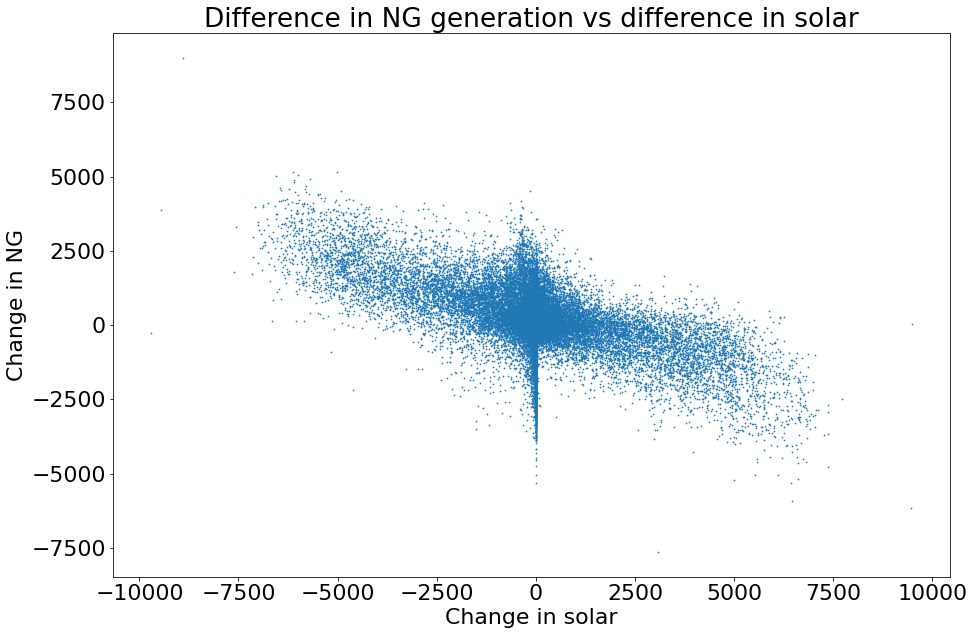

In [26]:
#Scatterplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
plt.scatter(df_diff['diff_solar'], df_diff['diff_NG'], s=0.5)
plt.title("Difference in NG generation vs difference in solar")
plt.xlabel("Change in solar")
plt.ylabel("Change in NG")
plt.show()

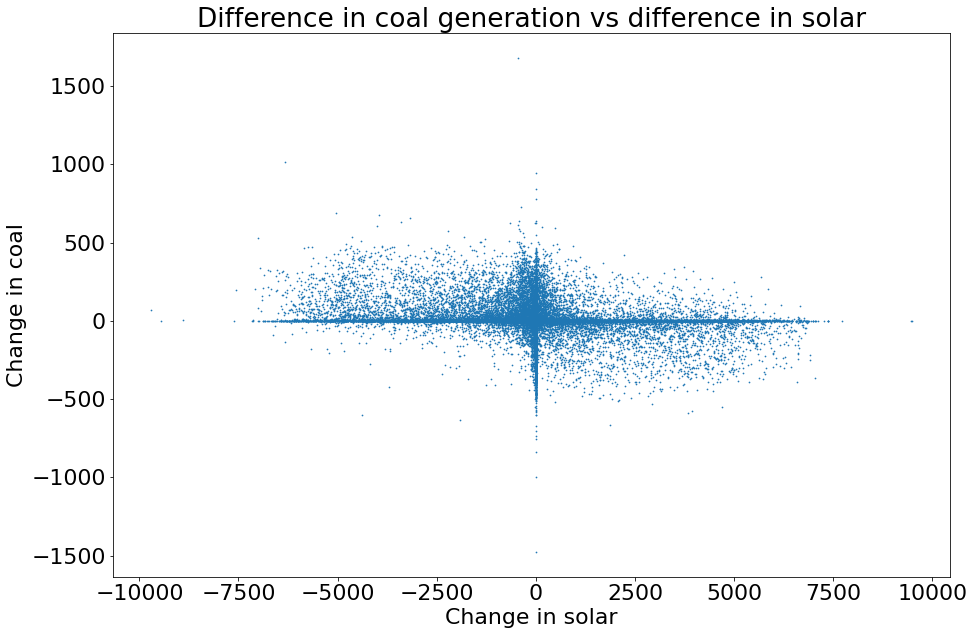

In [27]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
plt.scatter(df_diff['diff_solar'], df_diff['diff_coal'], s=0.5)
plt.title("Difference in coal generation vs difference in solar")
plt.xlabel("Change in solar")
plt.ylabel("Change in coal")
plt.show()

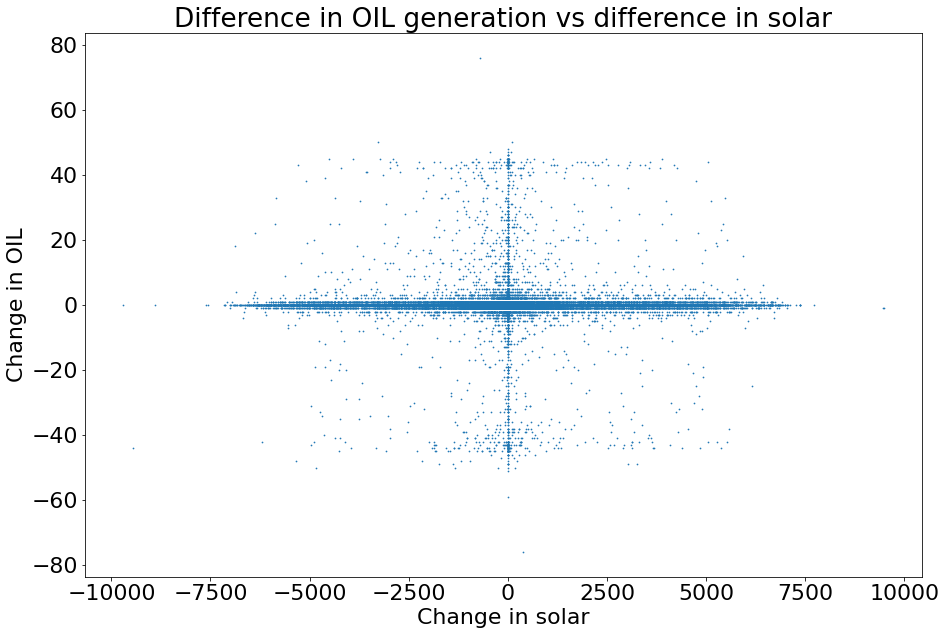

In [28]:
#Scatterplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
plt.scatter(df_diff['diff_solar'], df_diff['diff_oil'], s=0.5)
plt.title("Difference in OIL generation vs difference in solar")
plt.xlabel("Change in solar")
plt.ylabel("Change in OIL")
plt.show()